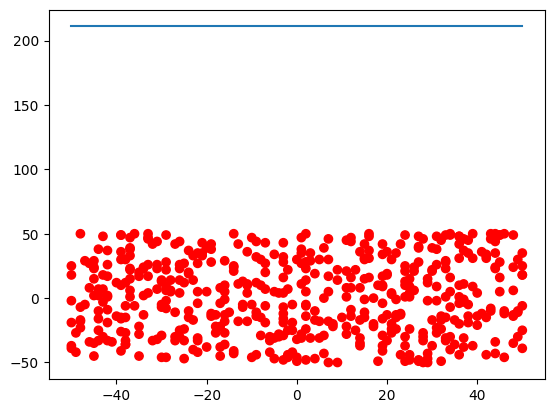

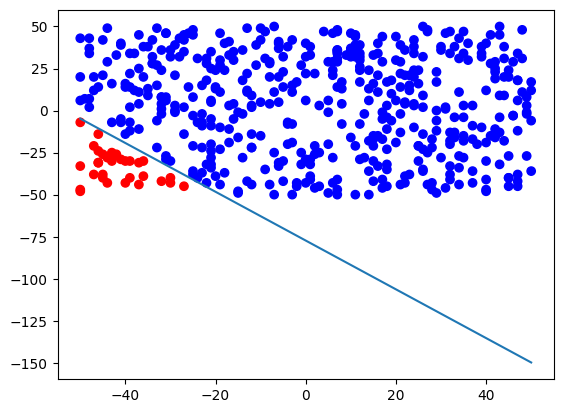

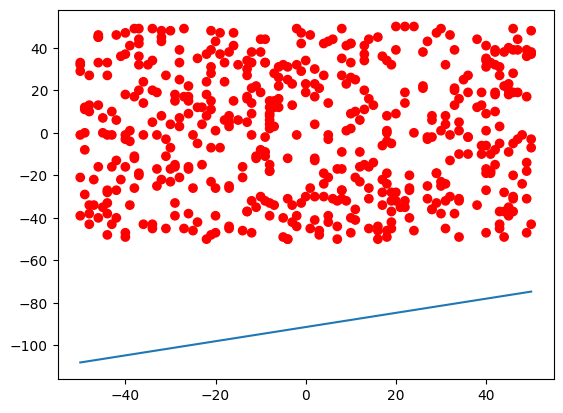

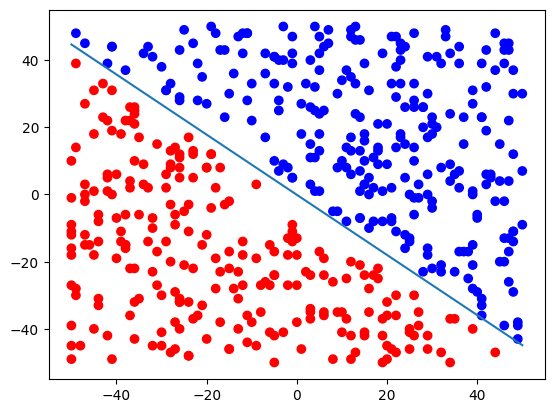

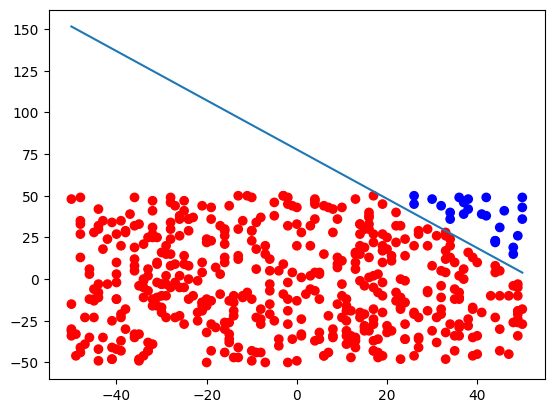

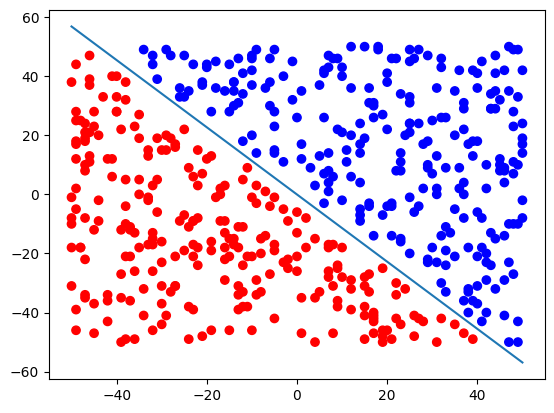

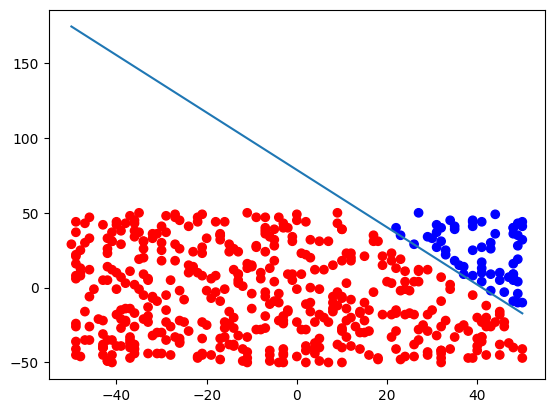

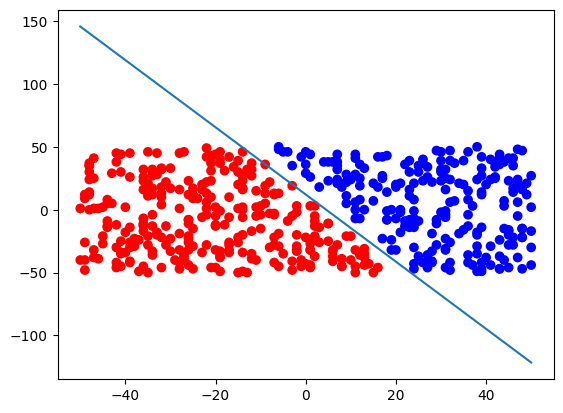

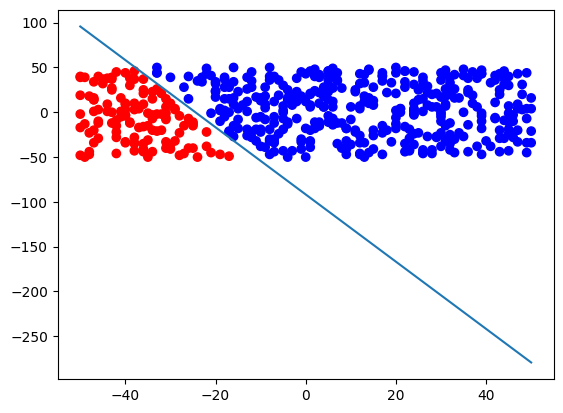

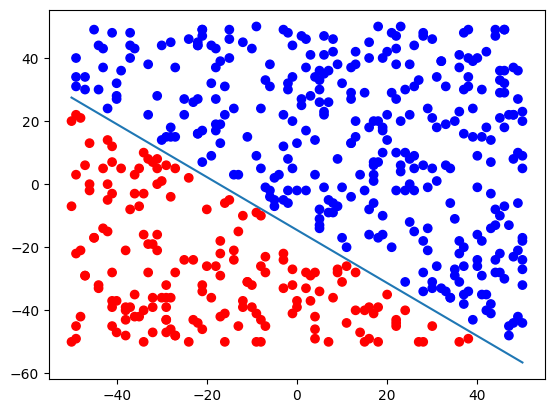

Dimension 2 complete


In [ ]:
from Tools import linearClassifyingTools

dimensions = (2,160,20)
margin = 2
thetaRange = (-50,50)
points = 500
graphCountsForEachD=10

TauRuns = 5000

dimensionLists = []

for d in range(dimensions[0],dimensions[1] + 1, dimensions[2]):

    
    graphLists = []
    for i in range(graphCountsForEachD):

        theta = [ 0 for x in range(d)]
        theta_zero = 0
        data = linearClassifyingTools.generateRandomData(d,points,margin,thetaRange)

        lossHistory = []  
        for i in range(TauRuns): 
            countWrong=0

            for element in data:
                x = element[0]
                y= element[1]

                if y*(linearClassifyingTools.dot(theta,x) + theta_zero) <= 0:
                    theta =  linearClassifyingTools.plusVector(theta, linearClassifyingTools.multScalar(x,y))
                    theta_zero += y
                    countWrong +=1
            lossHistory.append((countWrong/points *100, i))
            if countWrong ==0:
                lossHistory.append((0, i+1))
                lossHistory.append((0, i+2))
                lossHistory.append((0, i+3))
                lossHistory.append((0, i+4))
                lossHistory.append((0, i+5))
                break
        graphLists.append(lossHistory)

        if d == 2:
            linearClassifyingTools.plot(data,theta,theta_zero, thetaRange)
    dimensionLists.append(graphLists)
    print("Dimension "+ str(d) + " complete") 

# print(dimensionLists)

linearClassifyingTools.plotKs(dimensionLists,dimensions)


# linearClassifyingTools.plot(data,theta,theta_zero)